../data/study_1A_mat_simple/S_01/night_1/EEG_raw.mat
Raw data loaded
Creating RawArray with float64 data, n_channels=25, n_times=14250000
    Range : 0 ... 14249999 =      0.000 ... 28499.998 secs
Ready.
../data/study_1A_mat_simple/S_01/night_1/EEG_raw_250hz.npy
Creating RawArray with float64 data, n_channels=25, n_times=7125000
    Range : 0 ... 7124999 =      0.000 ... 28499.996 secs
Ready.
Opening raw-browser...


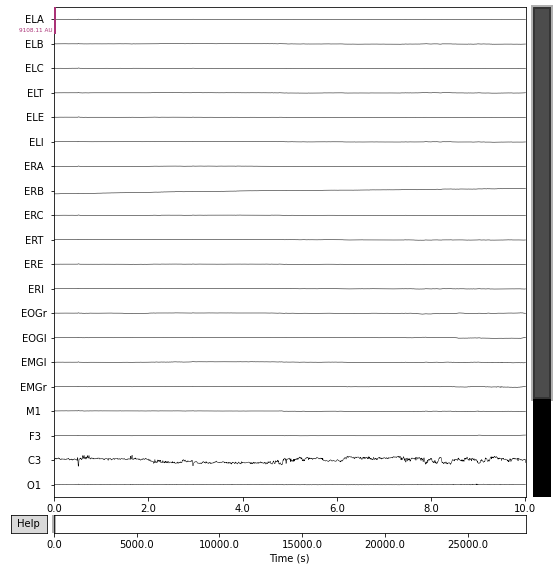

Opening raw-browser...


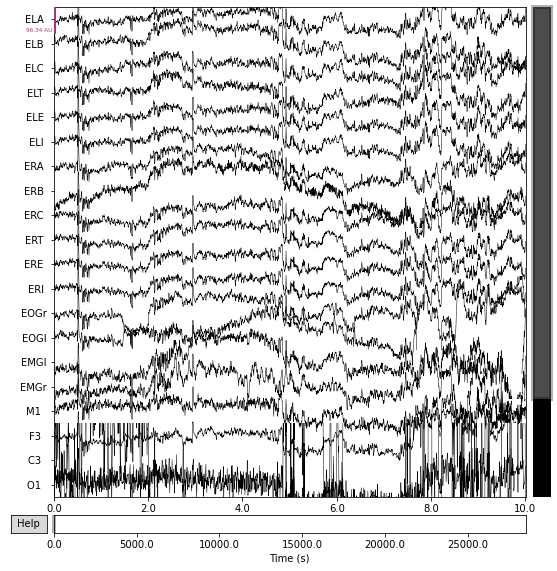

debug


In [7]:
# Function to filter mne raw signal
def filter_signal(raw, l_freq, h_freq, picks=None):
    raw.filter(l_freq, h_freq, picks=picks)
    #raw.plot(block=True) # Plot the mne raw EEG filtered data
    return raw
    
    
# This section processes the data, and creates files inside the original folder structure.
import numpy as np
import mne
import scipy.io as sio
import hdf5storage
import os
import math



clean_data_dir = '//uni.au.dk/dfs/Tech_EarEEG/Students/RD2022_Artefact_AkselStark/data/1A/study_1A_mat_simple_cleaned'
#raw_data_dir = '//uni.au.dk/dfs/Tech_EarEEG/Students/RD2022_Artefact_AkselStark/data/1A/study_1A_mat_simple'
raw_data_dir = '../data/study_1A_mat_simple/S_01/night_1'

# Run through all the cleaned EEG files
for subdir, dirs, files in sorted(os.walk(raw_data_dir)):
    for file in files:
        if "EEG" in file and not "250hz" in file:
            print(os.path.join(subdir, file))
            data_raw = hdf5storage.loadmat(os.path.join(subdir, file))
            print('Raw data loaded')

            # Labels are needed for MNE. Imported, reshaped and converted to list
            labels = data_raw['chanlabels'].reshape(25).tolist() #channel labels needed to load data with MNE
        
            # First load a nights data into mne, then resample to 250 hz, then get the numpy array out again with ._data
            # Data is converted to 32 bit
            npdata = np.nan_to_num(data_raw['data'])# change nan to 0 to enable downsampling
            
            mne_data_raw = mne.io.RawArray(npdata, mne.create_info(labels,500))
            
        # if the file is filtered, load that in as well
        if "250hz" in file:
            print(os.path.join(subdir, file))
            #load the filtered data from numpy file
            data = np.load(os.path.join(subdir, file)) 
            mne_data_filtered = mne.io.RawArray(data, mne.create_info(labels,250))
            
# Plot both mne signals
mne_data_raw.plot(block=True)
mne_data_filtered.plot(block=True)

print("debug")

KeyboardInterrupt: 

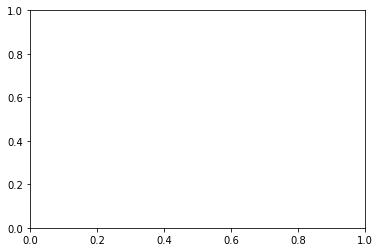

In [8]:
import matplotlib.pyplot as plt
#Convert to numpy array
def convert_to_numpy(mne_data):
    return mne_data._data

raw = convert_to_numpy(mne_data_raw)
filtered = convert_to_numpy(mne_data_filtered)

# Compare the 2 signals by plotting segments of the data
def plot_segments(raw, filtered, sectionLength):
    # Plot the first 10 seconds of the raw data
    raw_segment = raw[0:sectionLength*2,:]
    filtered_segment = filtered[0:sectionLength,:]
    plt.plot(raw_segment)
    plt.plot(filtered_segment)
    plt.show()
    
plot_segments(raw, filtered, 1000)